<a href="https://colab.research.google.com/github/0karim0/Handwritten-Digits-Classification/blob/main/Handwritten_Digits_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.engine.sequential import Sequential
from keras.layers import Dense , Dropout
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix

# **Load Data**

In [2]:
(x_train, y_train ), (x_test, y_test ) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"x_train: {len(x_train)}")
print(f"x_test: {len(x_test)}")

print(f"y_train: {len(x_train)}")
print(f"y_test: {len(y_test)}")

x_train: 60000
x_test: 10000
y_train: 60000
y_test: 10000


In [28]:
y_train = keras.utils.to_categorical(y_train, num_examples)
y_test = keras.utils.to_categorical(y_test, num_examples)

# **Visualize Examples**

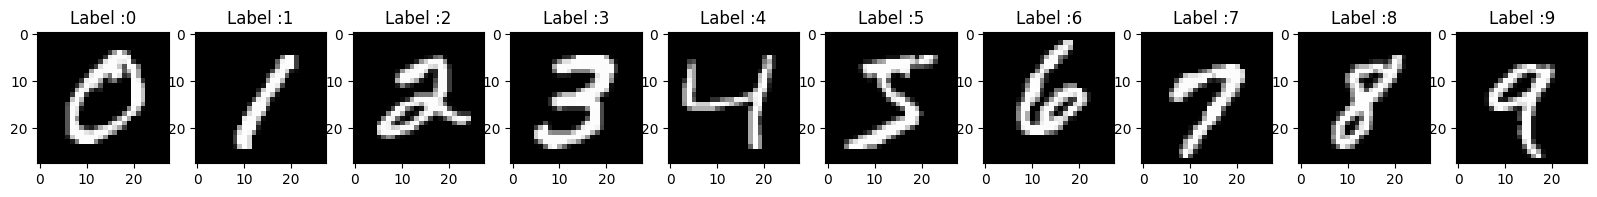

In [5]:
num_examples = 10
fig, ax = plt.subplots(1, num_examples, figsize=(20, 20) )

for i in range(0, num_examples):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title(f'Label :{i}')

# **Prepare Data**

In [6]:
x_train = x_train / 225.0

x_test = x_test / 225.0

In [7]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [8]:
x_train.shape

(60000, 784)

In [9]:
x_test.shape

(10000, 784)

# **Model**

In [39]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [40]:
batch_size = 512
epochs = 20
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
118/118 [==============================] - 2s 4ms/step - loss: 0.5695 - accuracy: 0.8379
Epoch 2/20
118/118 [==============================] - 0s 4ms/step - loss: 0.2075 - accuracy: 0.9398
Epoch 3/20
118/118 [==============================] - 0s 4ms/step - loss: 0.1516 - accuracy: 0.9556
Epoch 4/20
118/118 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9642
Epoch 5/20
118/118 [==============================] - 0s 4ms/step - loss: 0.1000 - accuracy: 0.9699
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.9755
Epoch 7/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9785
Epoch 8/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9816
Epoch 9/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9833
Epoch 10/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9845

# **Evaluate**

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9820
Test Loss: 0.06763190031051636, Test Accuracy: 0.9819999933242798


In [43]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 1s 3ms/step


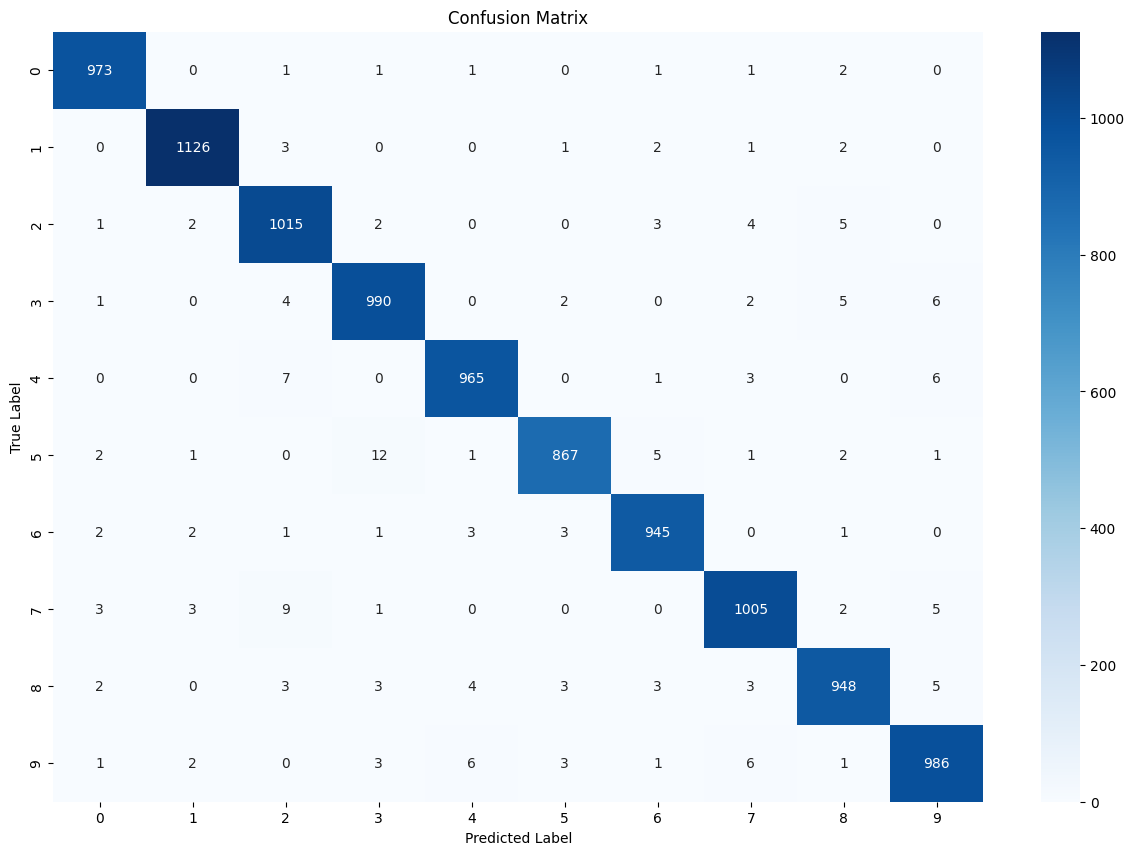

In [44]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');


# Investigate Some Errors


In [45]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]


In [46]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

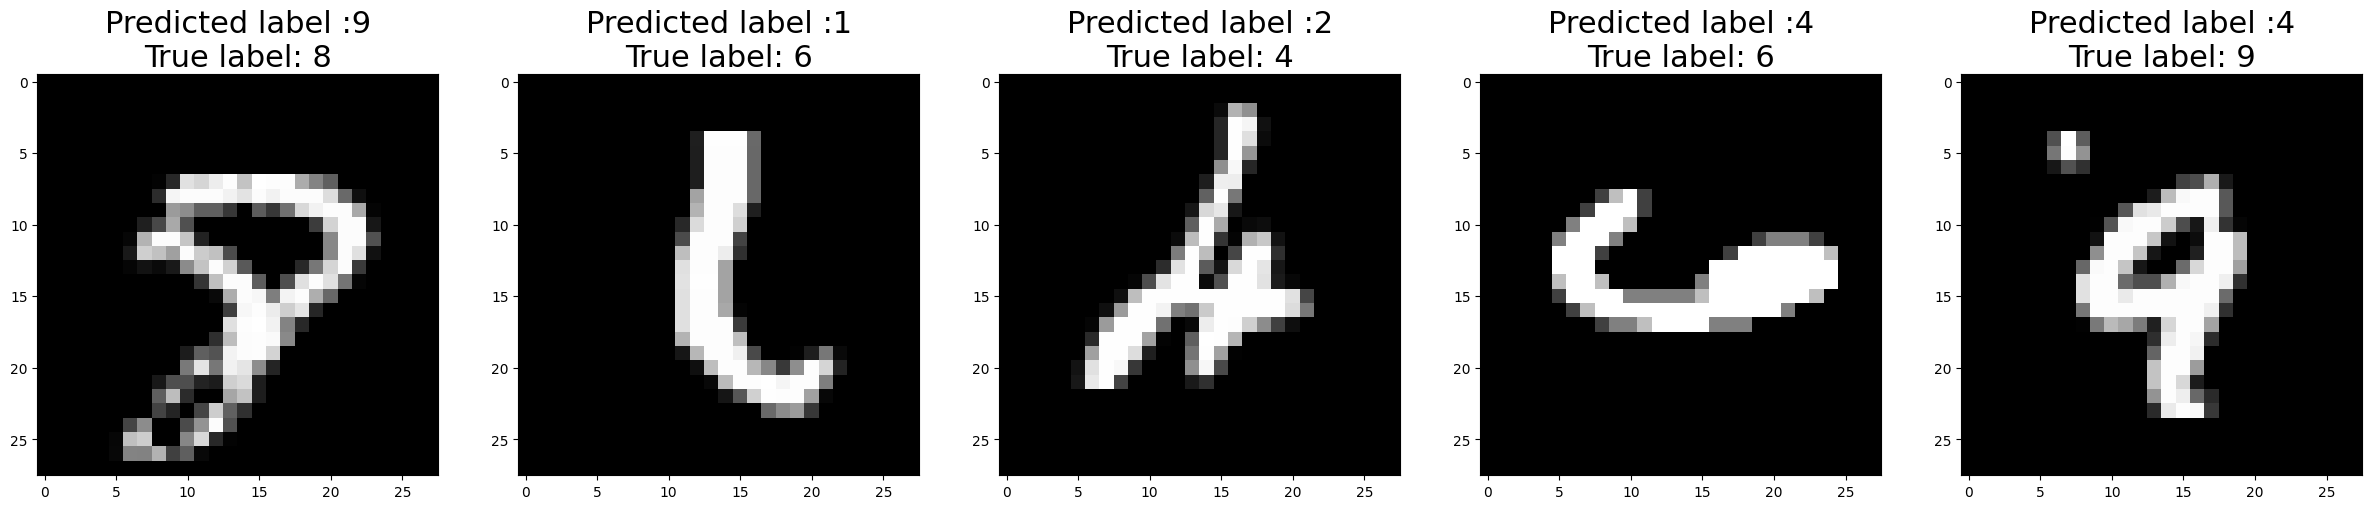

In [47]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)